In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Midterm - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every **HOUR** that it is late.  If you feel that there is a special circumstance that warrants consideration tells us **BEFORE** the Tuesday (and more so before the exam starts).

Good luck!

## Question 1

**(a)** (10 points)  Using the second order, centered difference approximation to the first derivative find the $\Delta x$ that gives the smallest absolute error graphically for the function
$$
    f(x) = x \sin(x) + 3 \cos(x) - x
$$  
at $x = 2$.  Repeat this for the first order forward difference.  You do not have to be precise but be within an order of magnitude.

2.41191333572e-08 6.01252381216e-12
Minimum Delta x for first order 1e-08
Minimum Delta x for Second order 1e-05


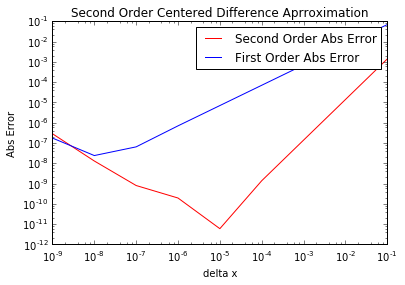

In [16]:
### INSERT CODE HERE
f = lambda x: x*numpy.sin(x) + 3.0*numpy.cos(x) - x
f_prime = lambda x: x*numpy.cos(x) - 2.0*numpy.sin(x) - 1

delta_x = []
error_second = []
error_first = []

for i in xrange(1,10):
    delta_x.append(10**-i)

    f_prime_hat_second = ((f(2.0+delta_x[-1]) - f(2.0-delta_x[-1])) / (2.0*delta_x[-1]))
    f_prime_hat_first = ((f(2.0+delta_x[-1]) - f(2.0)) / delta_x[-1])
    
    error_second.append(numpy.abs(f_prime_hat_second - f_prime(2.0)))
    error_first.append(numpy.abs(f_prime_hat_first - f_prime(2.0)))
        
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

print numpy.min(error_first), numpy.min(error_second)
print "Minimum Delta x for first order", delta_x[numpy.argmin(error_first)]
print "Minimum Delta x for Second order", delta_x[numpy.argmin(error_second)]

axes.loglog(delta_x, error_second,'r', label="Second Order Abs Error")
axes.loglog(delta_x, error_first,'b', label="First Order Abs Error")
axes.set_title("Second Order Centered Difference Aprroximation")
axes.set_ylabel("Abs Error")
axes.set_xlabel("delta x")
#axes.set_xlim(0, 1)
axes.legend(loc=1)
plt.show()



**(b)** (3 points) Why is there an optimal $\Delta x$?  Why might it be different for each approach?  What method would you choose?

As the above graph indicates, the optimal $\Delta x$ for first order is of magnitude $10^-8$ whereas for second order differences we have $10^-5$. As expected, second order has an optimal delta x that is larger than first order. There might be a delta x because there is that error term $R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$ which can be minimized. Thus, as we take out these higher order terms, there is a delta x that minimizes this residual that we are getting rid of. It is different for each approach becuse each approah has different orders and as such, a different number of higher order terms are taken out. In this case, second order may be better because our delta x is allows to be larger. 

# Question 2

**(a)** (5 points) Analytically compute the interpolating polynomial given by the following data

$\begin{array}{l|l|l|l|l}
x_j  & 0 & 1 & 2 & 3\\
\hline
f_j & 0 & 0 & 6 & 24
\end{array}$

**Newton's Method**

In general then $P_N(x)$ can be written in Newton's form as

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

In our case with three points we have:

$$P_3(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + (x - x_0) (x - x_1)(x- x_2) [y_0, y_1, y_2, y_3]$$

Solving for the bracketed quantities:

$$[y_0] = y_0 = 0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{0-0}{1} = 0$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} = \frac{6}{2} - 0 = 3$$

$$[y_0, y_1, y_2,y_3] = \frac{[y_1,y_2,y_3] - [y_0,y_1,y_2]}{x_3-x_0} = \frac{1}{x_3 - x_0}\bigg[\frac{y_3 - y_2}{(x_3 - x_2)(x_3 - x_1)} - \frac{y_2 - y_1}{(x_2 - x_1)(x_3 - x_1)}\bigg] - \frac{3}{x_3-x_0} = \frac{1}{3}\bigg[\frac{18}{2} - \frac{6}{2}\bigg] - \frac{3}{3} = 1 $$

Plugging in:

$$P_3(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + (x - x_0) (x - x_1)(x- x_2) [y_0, y_1, y_2, y_3] = 0 + 0 + 3(x)(x-1) + (x)(x-1)(x-2)(1) = 3x^2 - 3x + x^3 - 3x^2 + 2x = x^3-x$$

$$P_3(x) = x^3 - x = x(x^2 - 1) = x(x+1)(x-1)$$

**(b)** (3 points) Show that the interpolating polynomial you found is indeed an interpolant of the data.

**Solution** 

We know that an interpolant must pass through all the given data points. Therefore, to show that this is indeed an interpolant of our data, we can plug back in each point:

For (0,0):

$$P_3(x) = x^3 - x = 0 - 0 = 0 \: \checkmark$$

For (1,0):

$$P_3(x) = x^3 - x = 1 - 1 = 0 \: \checkmark$$

For (2,6):

$$P_3(x) = x^3 - x = 8 - 2 = 6 \: \checkmark$$

For (3,24):

$$P_3(x) = x^3 - x = 27 - 3 = 24 \: \checkmark$$

**(c)** (2 points) Determine the first and second derivative of $p$ and use the result to describe the shape of the function that data may have come from.  

**Solution**

Analytically, its is fairly easy to find the derivative of our interpolant:

$$P_3(x) = x^3 - x$$

$$P_3'(x) = 3x^2 - 1$$

$$P_3''(x) = 6x$$

The first derivative tells us whether the function is increasing or decreasing. Therefore, the shape of the function that our data came from will be increasing as $|x| > \sqrt(\frac{1}{3})$. This suggests a parabolic shape.

The second derivative tells us whether the first derivative is increasing or decreasing. For the shape of the orignal function then, this translates to concavity. Thus, for $x > 0$, the function of our data should be concave up and for $x < 0$ we'll get concave down

**(d)** (3 points) Plot the interpolating polynomial with the data points included to verify all that you have found.  Make sure to properly label your plot.  Also mark the maxima and minima you found.

Minimum is:  0.57735026919 -0.38490017946


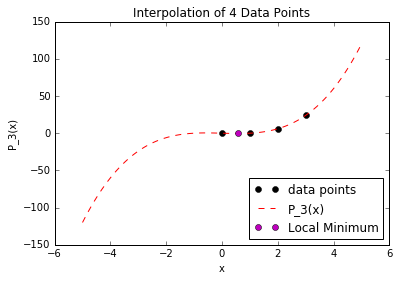

In [227]:
### INSERT CODE HERE
x_data = [0,1,2,3]
y_data = [0,0,6,24]

p_3 = lambda x: x**3 - x

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

x = numpy.linspace(-5,5,100)
x_min = 1 / numpy.sqrt(3)
axes.plot(x_data, y_data, 'ko', label="data points")
axes.plot(x,p_3(x), 'r--', label="P_3(x)")
axes.plot(x_min, p_3(x_min), 'mo', label="Local Minimum")
axes.set_title("Interpolation of 4 Data Points")
axes.set_xlabel("x")
axes.set_ylabel("P_3(x)")
axes.legend(loc=4)

print "Minimum is: ", x_min, p_3(x_min)

plt.show()


## Question 3

Suppose we have a system of non-linear equations we want to solve.  Define
$$
    \vec{x} = [x_0, x_1, \ldots, x_n]
$$ 
and 
$$
    \vec{f}(\vec{x}) = [f_0(\vec{x}), f_1(\vec{x}), \ldots, f_n(\vec{x})] = \vec{0}.
$$ 
We can derive a multi-dimensional version of Newton's method by considering the multi-dimensional Taylor series around the point $\vec{x}$ of each function $f_i$,
$$
    f_i(\vec{x} + \vec{\delta}) = f_i(\vec{x}) + \sum^n_{j = 1} \frac{\partial f_i}{\partial x_j} \delta_j + \mathcal{O}(\Delta x^2).
$$
where
$$
    \vec{\delta} = [\delta_0, \delta_1, \ldots, \delta_n]
$$
and
$$
    \Delta x = \max_{i=0, n} \delta_i.
$$

As we did before for Newton's method we drop the higher order terms and set $\vec{f}(\vec{x} + \vec{\delta}) = 0$ we can rewrite the above equation as
$$
    \mathbf{J}(\vec{x}) \vec{\delta} = -\vec{f}(\vec{x})
$$
where $\mathbf{J}$ is the Jacobian matrix defined by
$$
    J_{ij} = \frac{\partial f_i}{\partial x_j}.
$$
This is now a linear system that needs to be solved for the vector $\vec{\delta}$ which can then be used in the update formula
$$
    \vec{x}_{i+1} = \vec{x}_i + \vec{\delta}.
$$

For the rest of the question please consider the system (note that $\log$ is the natural log)
$$\begin{aligned}
    \sin x + y^2 + \log z - 7 = 0& \\
    3 x + 2^y - z^3 + 1 = 0& \\
    x + y + z - 5.0= 0&
\end{aligned}$$

**(a)** (3 points) Analytically find the Jacobian of the system of equations.

**Solution**

$$J_{ij} = \frac{\partial f_i}{\partial x_j}$$

$$
J_{ij} = \begin{bmatrix} 
     cos(x) & 2y & \frac{1}{z} \\
     3 & log(2)2^y & -3z^2 \\
     1 & 1 & 1 
\end{bmatrix}
$$


**(b)** (3 points) Write a function that computes the Jacobian matrix given a vector $\vec{x} = [x, y ,z]$.

In [29]:
def jacobian(x):
    """Compute the jacobian of the above function
    
    :Input:
     - *x* (tuple) - x,y,z to evalaute jacobian with
     
    :Output:
     - *J* (matrix) - jacobian given [x,y,z]
    """
    ### INSERT CODE HERE
    J = [[numpy.cos(x[0]), 2*x[1] , 1 / x[2]],[3, numpy.log(2)*2**x[1], -3*x[2]**2],[1,1,1]]
    return J

In [30]:
x = (1.0, 1.0, 1.0)
answer = jacobian(x)
true = numpy.array([[ 0.5403023058681398, 2.0, 1.0],
                    [ 3.0, 1.3862943611198906, -3.0],
                    [1.0, 1.0, 1.0]])
numpy.testing.assert_allclose(jacobian((1.0, 1.0, 1.0)), true)
print "Success!"

Success!


**(c)** (10 points) Using the function from (b) write a new function that finds the root given an initial guess $\vec{x}_0$ using Newton's method for the system.  Use the `numpy.linalg.solve` command to solve the linear system at each step.  As a stopping criteria check that the distance of $\vec{f}(\vec{x})$ from $\vec{0}$ is below the given tolerance.

In [105]:
def newton(x, tolerance=1e-10):
    """Find the root given an initial guess
    
    :Input:
     - *x* (tuple) - x,y,z to evalaute jacobian with
     - *tolerance* (scalar) - Stopping criteria for newton's method

     
    :Output:
     - *x_arrow* (array) - roots of the system
    """
    ### INSERT CODE HERE
    #Given equations
    f_0 = lambda x,y,z: numpy.sin(x) + y**2 + numpy.log(z) - 7
    f_1 = lambda x,y,z: 3*x + 2**y - z**3 + 1 
    f_2 = lambda x,y,z: x + y + z - 5.0
    
    #Matrix evaluated at x_arrow
    def f_arrow(x_arrow):
        return [f_0(x_arrow[0], x_arrow[1], x_arrow[2]), f_1(x_arrow[0], x_arrow[1], x_arrow[2]), f_2(x_arrow[0], x_arrow[1], x_arrow[2])]
    
    MAX_STEPS = 100
    
    #Check if initial guess is already within tolerance
    x_arrow = [x[0],x[1],x[2]]
    if(numpy.all(numpy.abs(f_arrow(x_arrow) - numpy.zeros(len(x)) < tolerance))):
            print "Stopping Criteria Reached"
            return x_arrow
    
    #Newton's Method  
    for n in xrange(1, MAX_STEPS + 1):
        delta_arrow = numpy.linalg.solve(jacobian(x_arrow), [i*-1 for i in f_arrow(x_arrow)])
        x_arrow = numpy.add(x_arrow, delta_arrow)
        if(numpy.all(numpy.abs(f_arrow(x_arrow) - numpy.zeros(x_arrow.shape)) < tolerance)):
            print "Stopping Criteria Reached"
            return x_arrow
    print "Stopping Criteria not reached - max steps reached"
    return x_arrow

In [106]:
numpy.testing.assert_allclose(newton(x), numpy.array([ 0.5990537566405669, 2.3959314023778169, 2.005014840981616 ]))
print "Success!"

Stopping Criteria Reached
Success!


## Question 4

Consider the Lennard-Jones potential between two molecules
$$
    V(r) = 4 \epsilon \left [ \left(\frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right ]
$$
where $\epsilon$ and $\sigma$ are constants, and $r$ is the distance between the molecules.

**(a)** (10 points) Analytically find the minimum $\sigma / r$ that minimizes the potential.  Plot the potential and the minimum you found as a check.

**Solution**

Let $v = \frac{\sigma}{r}$

$$V(r) = 4 \epsilon (v^{12} - v^6)$$
$$V(r) = 4 \epsilon v^{12} - 4 \epsilon v^6$$


$$V'(r) = 48 \epsilon v^{11} - 24 \epsilon v^5 = 0$$
$$\epsilon v^{11} = \frac{1}{2} \epsilon v^5$$
$$v = \frac{1}{2}^{\frac{1}{6}}$$

Plugging back in to $V(r)$

$$V(r) = 4 \epsilon ((\frac{1}{2})^2 - \frac{1}{2}) = -\epsilon$$

0.729790700964 -0.3165555 -0.3165555
-0.310569081068


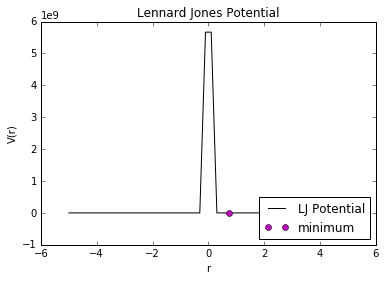

In [110]:
def lennard_jones(eps, sigma, r):
    return (4.*eps)*((sigma / r)**12 - (sigma / r)**6)

r = numpy.linspace(-5,5,50)
eps = .3165555
sigma = .6501696
v = ((.5)**(1./6.))
r_min = sigma / v
print r_min, lennard_jones(eps,sigma,r_min), -1.*eps
print numpy.min(lennard_jones(eps,sigma,r))

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(r, lennard_jones(eps,sigma,r), 'k', label="LJ Potential")
axes.plot(r_min, lennard_jones(eps,sigma,r_min), 'mo', label="minimum")
axes.set_title("Lennard Jones Potential")
axes.set_xlabel("r")
axes.set_ylabel("V(r)")
#axes.set_ylim(-10,10)
axes.legend(loc=4)
plt.show()

**(b)** (10 points) Using Golden section search compute the minimum of the potential numerically down to a bracket size of $10^{-6}$.  Plot the convergence to the true solution you found (the location) above at each step of the algorithm.  Also plot the potential and the minimum you found.  You can choose any value of $\epsilon$ you want.

Success!
  t* = 0.890898727731
  f(t*) = -0.3165555
  number of steps = 31


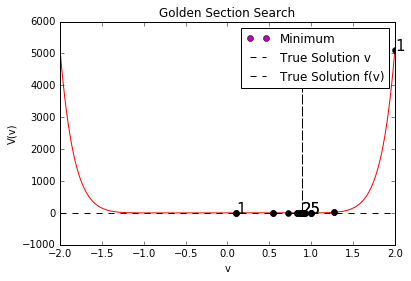

In [233]:
### INSERT CODE HERE
eps = .3165555
f = lambda x: (4*eps) * (x**12 - x**6)

phi = (numpy.sqrt(5.0) - 1.0) / 2.0

TOLERANCE = 1e-6
MAX_STEPS = 100

x = [0.1, None, None, 2.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

t = numpy.linspace(-2, 2, 200)
fig = plt.figure()

axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t), 'r')
axes.set_xlabel("v")
axes.set_ylabel("V(v)")
axes.set_title("Golden Section Search")
v = ((.5)**(1./6.))
axes.plot(v, f(v), 'mo', label="Minimum")
axes.plot(v*numpy.ones(t.shape), f(t), 'k--', label="True Solution v")
axes.plot(t, f(v)*numpy.ones(t.shape), 'k--', label="True Solution f(v)")

success = False
for n in xrange(1, MAX_STEPS + 1):
    axes.plot(x[0], f(x[0]),'ko')
    axes.plot(x[3], f(x[3]),'ko')
    if n % (int(MAX_STEPS / 4)) == 0 or n == 1:
        axes.text(x[0], f(x[0]), str(n), fontsize="15")
        axes.text(x[3], f(x[3]), str(n), fontsize="15")
    f_1 = f(x[1])
    f_2 = f(x[2])
    
    if f_1 < f_2:
        x[3] = x[2]
        x[2] = x[1]
        x[1] = x[3] - phi * (x[3] - x[0])
    else:
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x[0] + phi * (x[3] - x[0])
        
    if numpy.abs(x[3] - x[0]) < TOLERANCE:
        success = True
        break
        
if success:
    print "Success!"
    print "  t* = %s" % str((x[3] + x[0]) / 2.0)
    print "  f(t*) = %s" % f((x[3] + x[0]) / 2.0)
    print "  number of steps = %s" % n
else:
    print "Reached maximum number of steps!"

axes.legend()  
plt.show()

**Comments**

The above graph shows the golden search method is indeed getting closer to the minimum, signified by the dotted vertical line. Moreover, f(t) does indeed equal $-\epsilon$ as expected.

## Question 5

The equation for an ellipse is $x^2/a^2 + y^2/b^2=1$.  The general equation for arc-length and therfore the circumference of an ellipse can be computed using
$$
    S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx.
$$

**(a)** (3 points) We can approximate the circumference by following a paper by Srinivasa Ramanujan in 1914 [1] where
$$
    S \approx \pi (a + b) \left ( 1 + \frac{3 h}{10 + \sqrt{4 - 3 h}} \right )
$$

which is $h^5$ order accurate where 
$$
    h = \frac{(a-b)^2}{(a + b)^2}.
$$
Implement a function that computes the approximation using Ramanujan's result.

1. Ramanujan, Srinivasa, (1914). "Modular Equations and Approximations to $\pi$". 
   Quart. J. Pure App. Math. 45: 350-372.

In [107]:
def S_ramanujan(a, b):
    ### INSERT CODE HERE
    h = (a-b)**2 / (a+b)**2
    S = numpy.pi*(a+b)*(1+(3*h / (10 + numpy.sqrt(4-3*h))))
    return S

In [108]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ramanujan(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Computed = 11.8037253012
True = 11.803725302
Error = 7.2932593298e-10
Success!


**(b)** (10 points) Another way to compute the circumference is to use a series due to Ivory and Bessel (you can find the original papers online which may be worth a look).  One way to write this series is

$$S = \pi (a + b) \sum^{\infty}_{n=0} \left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)^2 h^n ~~~~~ \text{with} ~~~~~~ h = \frac{(a - b)^2}{(a+b)^2}$$

where $\left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)$ is the binomial coefficient which can be computed via a `scipy` function.  Write a function to compute this series to a point where the difference between the partial sums is less than $\epsilon_{\text{machine}}$.

In [127]:
def S_ivory(a, b):
    ### INSERT CODE HERE
    import scipy.special as sp
    tolerance = numpy.finfo(float).eps
    h = (a-b)**2 / (a+b)**2
    
    N = 1000
    
    #Horner's Method
    p = numpy.array([sp.binom(.5,n-1)**2 for n in xrange(N+1, 0, -1)])
    y = p[0]
    for i,coef in enumerate(p[1:]):
        y = y*h + coef
        if i+2 <= N:
            y_next = y*h + p[i+2]
        else:
            y_next = y
        if numpy.abs(y_next - y) < tolerance:
            print "Tolerance Reached"
            break
    S = numpy.pi*(a+b)*y
    return S

In [128]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ivory(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Tolerance Reached
Computed = 13.4877298015
True = 13.4877298015
Error = 1.7763568394e-15
Success!


**(c)** (5 points) Derive an expression for the integrand using implicit differentiation.

**Solution**

$$S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx$$

$$x^2/a^2 + y^2/b^2=1$$

We want an expression for $\frac{dy}{dx}$:

$$\frac{2x}{a^2} + \frac{2y}{b^2}\frac{dy}{dx} = 0$$

$$\frac{dy}{dx} = -\frac{2x}{a^2}\frac{b^2}{2y} = -\frac{xb^2}{ya^2}$$

Plugging into our arc length forumula, the integrand now becomes:

$$S = 2 \int^a_{-a} \sqrt{1 + \frac{x^2b^4}{y^2a^4}} dx$$

We still have a y term in this equation that we dont want. Therefore, we can substitute from the initial relationship the term: $y = \sqrt{b^2 - \frac{x^2b^2}{a^2}}$

This gives us:

$$S = 2 \int^a_{-a} \sqrt{1 + \frac{x^2b^4}{(b^2 - \frac{x^2b^2}{a^2})a^4}} dx$$
$$S = 2 \int^a_{-a} \sqrt{1 + \frac{x^2b^2}{a^4 - x^2a^2}} dx$$



**(d)** (10 points) Write a function that computes the integral to a given tolerance.  Note that this may converge very slowly so use a high enough order quadrature rule so that the computation takes less than a minute to do (this will result in an error otherwise).  Suggested largest $N$ is $1000$.  If the integration does not succeed raise a `ValueError`.  Use the `S_exact` function used in the tests above to evaluate the tolerance.

In [167]:
def S_direct(a, b, tolerance):
    """Compute the integral above
    
    :Input:
     - *a* (scalar) - given constant for ellipse axis
     - *b* (scalar) - given constant for ellipse axis
     - *tolerance* (scalar) - Stopping criteria for quadrature method

     
    :Output:
     - *S* (scalar) - computed integral
    """    
    ### INSERT CODE HERE
    f = lambda x: numpy.sqrt(1+((x**2)*(b**2)) / (a**4 - ((x**2) * (a**2)) ) )
    
    N = 1000
    x = numpy.linspace(-1*a, a, N+1)
    delta_x = x[1] - x[0]
    
    #3-point Gaussian Method
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(3.0 / 5.0)
    xi_1 =  numpy.sqrt(3.0 / 5.0)
    suc_flag = False
    
    Qf = numpy.zeros(x.shape)
    Qf = (((8.0/9.0) * f(xi_map(x[0],x[1],0))) + (5.0/9.0)*(f(xi_map(x[0], x[1],xi_0)) + f(xi_map(x[0],x[1],xi_1)))) * (delta_x/2.0)
    for i in xrange(1, N):
        Qf += (((8.0/9.0) * f(xi_map(x[i],x[i+1],0))) + (5.0/9.0)*(f(xi_map(x[i], x[i+1],xi_0)) + f(xi_map(x[i],x[i+1],xi_1)))) * (delta_x/2.0)
        if numpy.abs(2.*Qf - S_exact(a, b)) < tolerance:
            print "Tolerance reached!"
            suc_flag = True
            break
    if suc_flag == False:
        raise ValueError("Integration Failed")
    return 2.*Qf

In [168]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-1
computed = S_direct(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Tolerance reached!
Computed = 12.0687242917
True = 12.1186822066
Error = 0.0499579148425
Success!


**(e)** (10 points) Note that we have been using a special function from SciPy called `ellipe`.  This function computes the elliptic integral of the second kind
$$
    E(e) = \int^{\pi/2}_0 \sqrt{1 - e^2 \sin^2 \theta} d\theta
$$
which is the arc-length over one quadrant of the ellipse.  The value $e$ is the eccentricity defined as
$$
    e = \sqrt{1 - b^2 / a^2}
$$
where here we need to define $a$ as the major-axis and $b$ the minor-axis of the ellipse (this definition is slightly different than the one in SciPy which we have been accommodating).  Elliptic integrals are a broad class of special functions that all arose from attempts at computing things related to ellipses.

Again write a function that computes the circumference of an ellipse to a provided tolerance but using this formulation of the problem.  If the integration does not succeed raise a `ValueError`.  Remember that computing the function above only gives you one quarter of the circumference and to find the total circumference you want to use
$$
    S = 4 a E(e).
$$

In [234]:
def S_elliptic_integral(a, b, tolerance):
    """Compute the integral above
    
    :Input:
     - *a* (scalar) - given constant for ellipse axis
     - *b* (scalar) - given constant for ellipse axis
     - *tolerance* (scalar) - Stopping criteria for quadrature method

     
    :Output:
     - *S* (scalar) - computed integral
     """
    ### INSERT CODE HERE
    f = lambda x: numpy.sqrt(1 - numpy.sin(x)**2 + (b**2 / a**2)*numpy.sin(x)**2)
    
    N = 100
    x = numpy.linspace(0.0, numpy.pi / 2, N+1)
    delta_x = x[1] - x[0]
    
    #3-point Gaussian
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(3.0 / 5.0)
    xi_1 =  numpy.sqrt(3.0 / 5.0)
    suc_flag = False
    
    Qf = (((8.0/9.0) * f(xi_map(x[0],x[1],0))) + (5.0/9.0)*(f(xi_map(x[0], x[1],xi_0)) + f(xi_map(x[0],x[1],xi_1)))) * (delta_x/2.0)
    for i in xrange(1, N):
        Qf += (((8.0/9.0) * f(xi_map(x[i],x[i+1],0))) + (5.0/9.0)*(f(xi_map(x[i], x[i+1],xi_0)) + f(xi_map(x[i],x[i+1],xi_1)))) * (delta_x/2.0)
        if numpy.abs(4.0*a*Qf - S_exact(a, b)) < tolerance:
            print "Tolerance reached!"
            suc_flag = True
            break
    if suc_flag == False:
        raise ValueError("Integration Failed")
    S = 4.0*a*Qf
    return S

In [235]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-10
computed = S_elliptic_integral(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Tolerance reached!
Computed = 11.1031048071
True = 11.1031048071
Error = 7.1054273576e-15
Success!
